<a href="https://colab.research.google.com/github/foxtrotmike/CS909/blob/master/time_normalise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

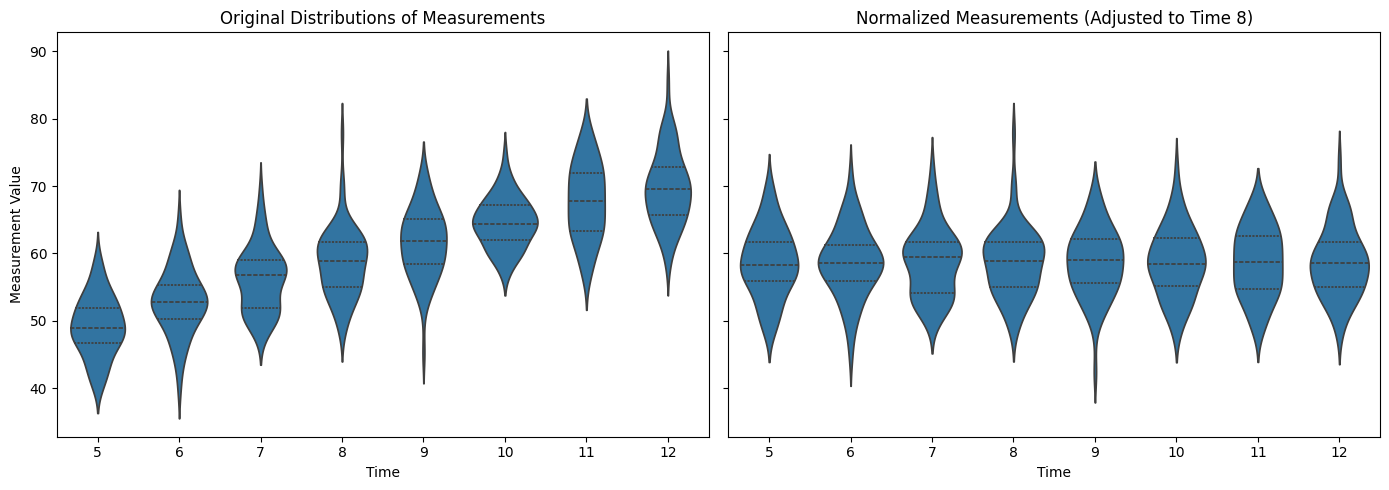

In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Generate synthetic data
np.random.seed(42)
n_patients = 500
time_points = np.array([5, 6, 7, 8, 9,10,11,12])  # Discrete time points
mean_trend = np.linspace(50, 70, len(time_points))  # Mean changes over time
std_dev = 5  # Constant standard deviation

# Simulate measurements at different time points
data = []
for t, mu in zip(time_points, mean_trend):
    g_values = np.random.normal(mu, std_dev, size=n_patients // len(time_points))
    for g in g_values:
        data.append([t, g])

df = pd.DataFrame(data, columns=["Time", "Measurement"])

# Fit normal distributions at each time point
fitted_means = []
fitted_stds = []
for t in time_points:
    subset = df[df["Time"] == t]["Measurement"]
    mu, sigma = norm.fit(subset)
    fitted_means.append(mu)
    fitted_stds.append(sigma)

# Choose reference time (e.g., time = 8)
t_ref = 8
mu_ref = fitted_means[list(time_points).index(t_ref)]
sigma_ref = fitted_stds[list(time_points).index(t_ref)]

# Normalize measurements
df["Normalized Measurement"] = df.apply(
    lambda row: (row["Measurement"] - fitted_means[list(time_points).index(row["Time"])]) /
                fitted_stds[list(time_points).index(row["Time"])] * sigma_ref + mu_ref,
    axis=1
)

# Plot original and normalized distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Original distributions
sns.violinplot(x="Time", y="Measurement", data=df, ax=axes[0], inner="quartile")
axes[0].set_title("Original Distributions of Measurements")
axes[0].set_ylabel("Measurement Value")

# Normalized distributions
sns.violinplot(x="Time", y="Normalized Measurement", data=df, ax=axes[1], inner="quartile")
axes[1].set_title(f"Normalized Measurements (Adjusted to Time {t_ref})")
axes[1].set_ylabel("Normalized Measurement Value")

plt.tight_layout()
plt.show()